# Introduction

Hello everyone! In this notebook, I will make a data analysis to Kaggle's Mall Customer Segmentation dataset. Let's first load the data.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/customer-segmentation-tutorial-in-python/Mall_Customers.csv


In [2]:
full_data = pd.read_csv('/kaggle/input/customer-segmentation-tutorial-in-python/Mall_Customers.csv')

In [3]:
full_data.shape

(200, 5)

In [4]:
full_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
full_data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

So we can see that this data has 200 samples with 5 columns, and there is no missing value, which is always a good thing. Now I want to see the distribution for each column.

# Univariate Data Analysis

**Gender Distribution**

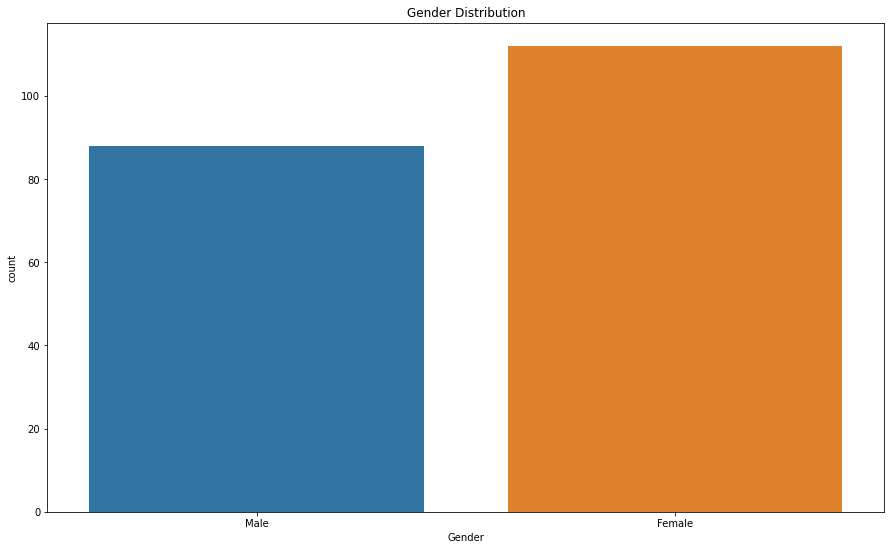

Female    112
Male       88
Name: Gender, dtype: int64


In [6]:
plt.figure(figsize=(15, 9))
plt.title("Gender Distribution")
sns.countplot(x=full_data['Gender'])

plt.show()

print(full_data['Gender'].value_counts())

So in this dataset, there are slighly more female customers than male customers. Speicically, there are 112 female customers and 88 male customers.

**Age Distribution**

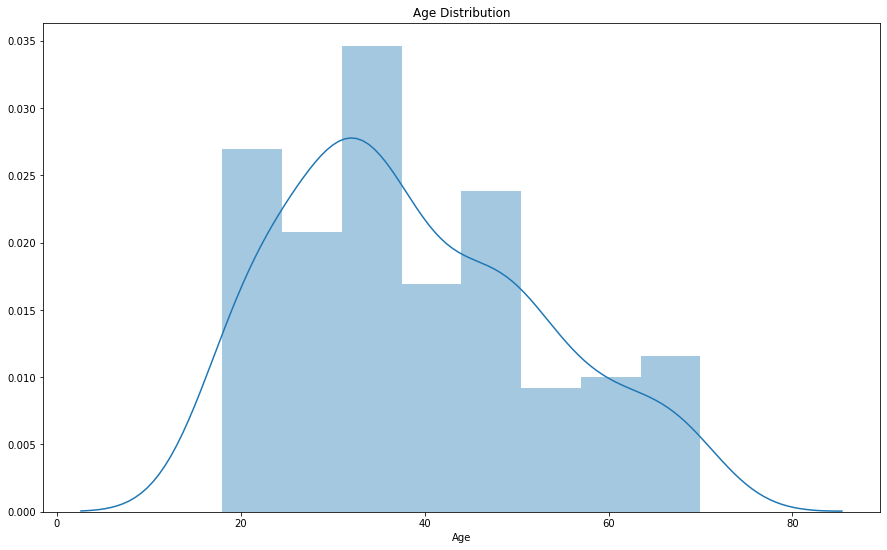

In [7]:
plt.figure(figsize=(15, 9))
plt.title("Age Distribution")
sns.distplot(a=full_data['Age'])

plt.show()

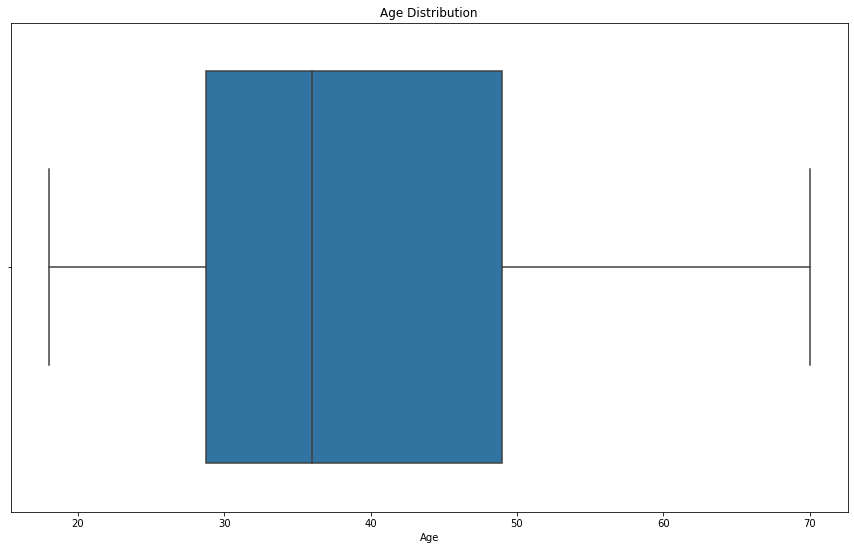

count    200.000000
mean      38.850000
std       13.969007
min       18.000000
25%       28.750000
50%       36.000000
75%       49.000000
max       70.000000
Name: Age, dtype: float64


In [8]:
plt.figure(figsize=(15, 9))
plt.title("Age Distribution")
sns.boxplot(x=full_data['Age'])

plt.show()

print(full_data['Age'].describe())

So the age distribution is slighly right-skewed, meaning there are more customers around 30s. Also, most of the customers are between 28 and 49 years old. These may be valuable information for the salespeople. Moreover, there seems to be no outlier in the age distribution as the boxplot illustrates. 

**Income Distribution**

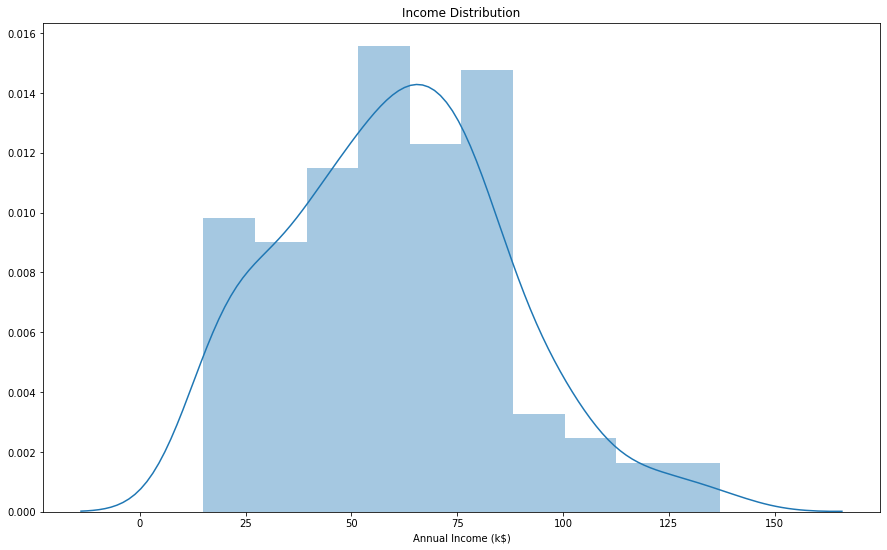

In [9]:
plt.figure(figsize=(15, 9))
plt.title("Income Distribution")
sns.distplot(a=full_data['Annual Income (k$)'])

plt.show()

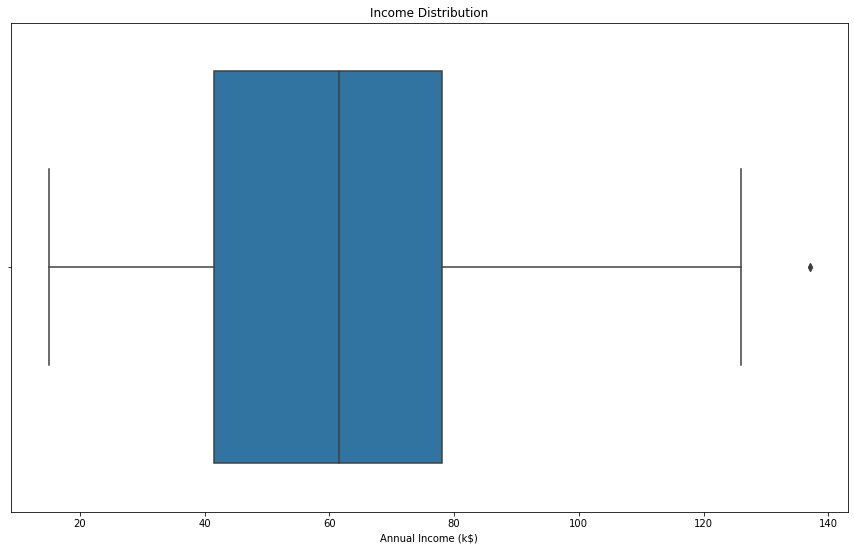

count    200.000000
mean      60.560000
std       26.264721
min       15.000000
25%       41.500000
50%       61.500000
75%       78.000000
max      137.000000
Name: Annual Income (k$), dtype: float64


In [10]:
plt.figure(figsize=(15, 9))
plt.title("Income Distribution")
sns.boxplot(x=full_data['Annual Income (k$)'])

plt.show()

print(full_data['Annual Income (k$)'].describe())

So income also is slightly right-skewed, and most people make 40 to 80K per year. However, this time there seems to be outliers as the boxplot has a dot at 137K. Let's see which customer it is.

In [11]:
full_data.loc[full_data['Annual Income (k$)'] == 137]

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
198,199,Male,32,137,18
199,200,Male,30,137,83


There are actually two customers who make 137K per year, and their customer ID, gender, and age are also very similar. However, an interesting fact is that their spending scores are very different, almost on the two side of the score spectrum! This is very strange, because normally one may think that if someone has a high annual income, he will buy more things from the mall, which thus assigns the customer a high spending score. 

**Spending Score Distribution**

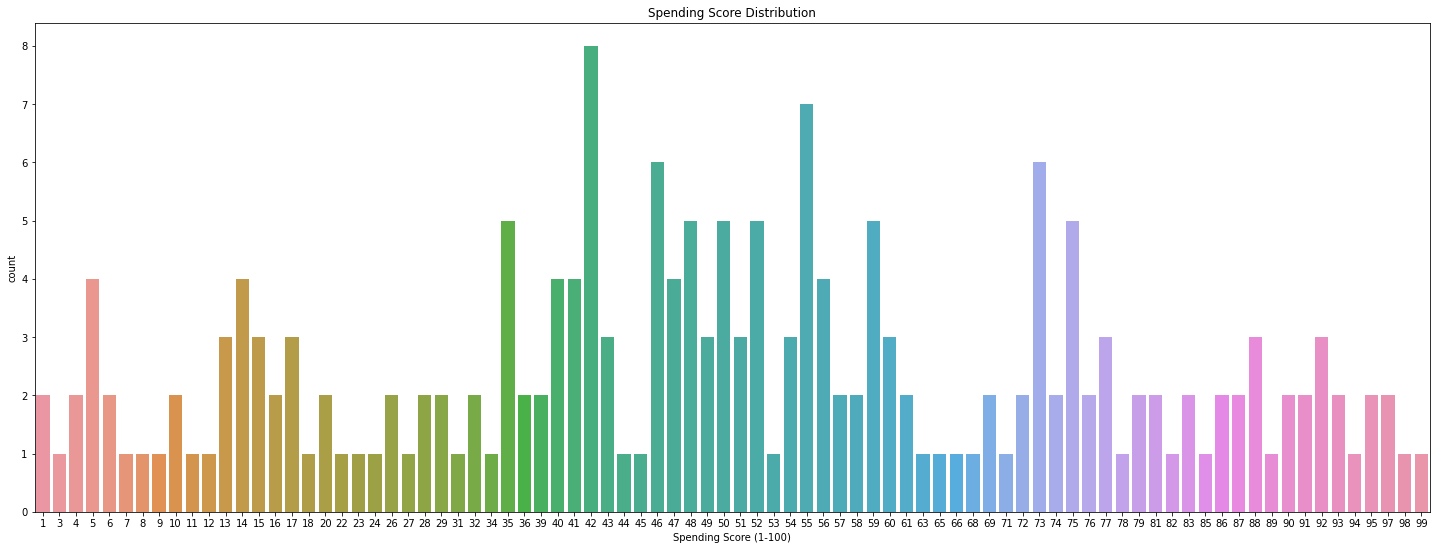

In [12]:
plt.figure(figsize=(25, 9))
plt.title("Spending Score Distribution")
sns.countplot(x=full_data['Spending Score (1-100)'])

plt.show()

This seems to be symmetric, and most customers have a spending score around 50. The single spending score that is most frequent is 42. 

# Bivariate Data Analysis

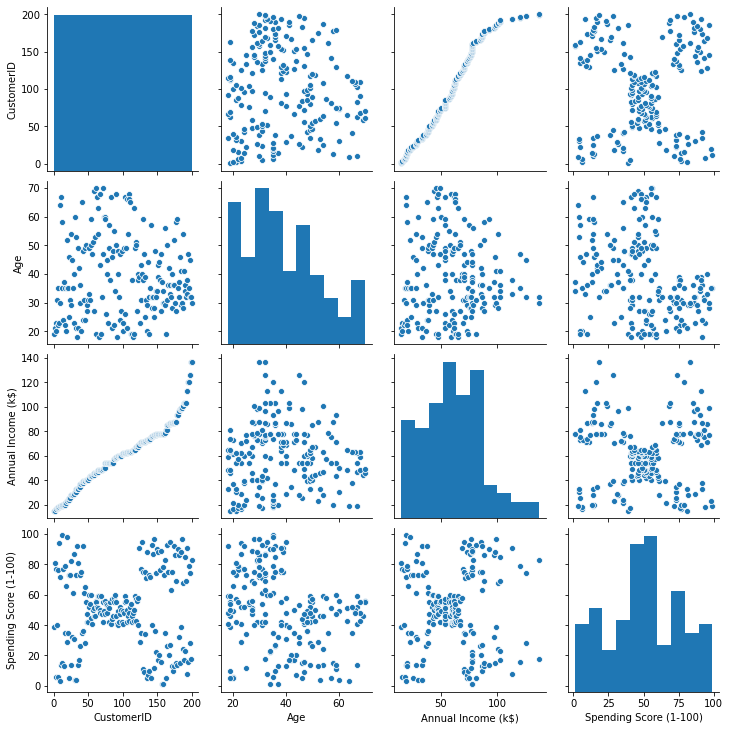

In [13]:
sns.pairplot(full_data)
plt.show()

These pairplots show the relationships between each columns. We can see some interesting features from the plots. First, it seems like annual income has a very strong linear association with customer ID. The higher the income is, the higher the customer ID is. Perhaps we can infer that the mall assigns customer ID based on customer's salary. Also, we can see from Customer ID vs Spending Score graph and Annual Income vs Spending Score graph that the distributions seem to form 5 clusters. I want to use K-Means to group the customers.

# K-Means Implementation

**Customer ID vs. Spending Score**

Again, let's see the plot of Customer ID vs. Spending Score. The graph clearly shows five clusters, which are customers with 1). low Customer ID and high Spending Score, 2). low Customer ID and low Spending Score, 3). medium Customer ID and medium Spending Score, 4). high Customer ID and high Spending Score, and 5). high Customer ID and low Spending Score.

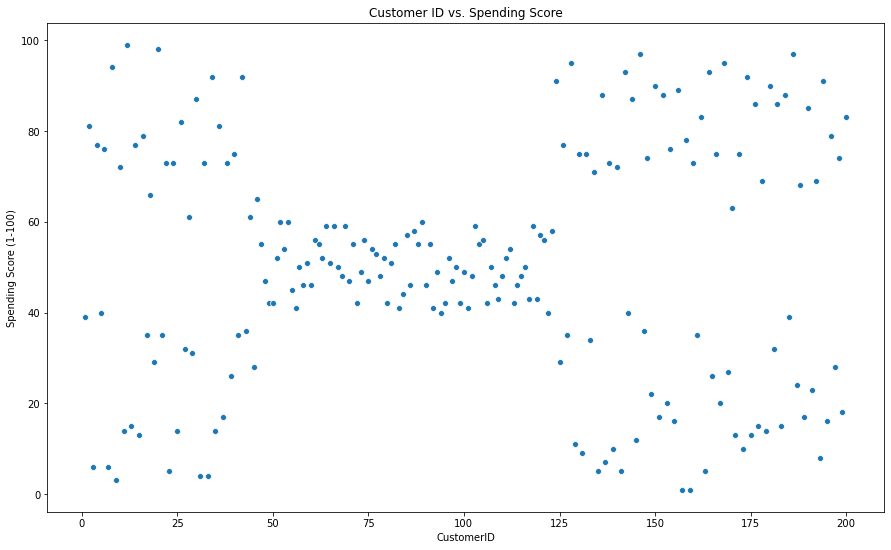

In [14]:
plt.figure(figsize=(15, 9))
plt.title("Customer ID vs. Spending Score")
sns.scatterplot(x=full_data['CustomerID'], y=full_data['Spending Score (1-100)'])

plt.show()

**Customer ID and Spending Score Clustering**

Now let's see if the K-Means can cluster the customers into these five groups.

In [15]:
id_X = full_data.iloc[:, [0, 4]].values
id_X.shape

(200, 2)

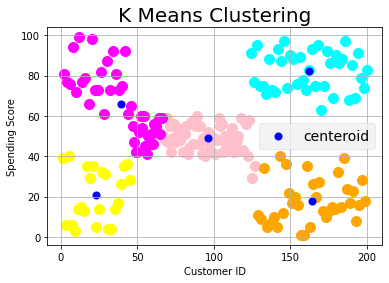

In [16]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 1000, n_init = 10, random_state = 0)
y_means = km.fit_predict(id_X)

plt.scatter(id_X[y_means == 0, 0], id_X[y_means == 0, 1], s = 100, c = 'pink')
plt.scatter(id_X[y_means == 1, 0], id_X[y_means == 1, 1], s = 100, c = 'yellow')
plt.scatter(id_X[y_means == 2, 0], id_X[y_means == 2, 1], s = 100, c = 'cyan')
plt.scatter(id_X[y_means == 3, 0], id_X[y_means == 3, 1], s = 100, c = 'magenta')
plt.scatter(id_X[y_means == 4, 0], id_X[y_means == 4, 1], s = 100, c = 'orange')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 50, c = 'blue' , label = 'centeroid')

plt.style.use('fivethirtyeight')
plt.title('K Means Clustering', fontsize = 20)
plt.xlabel('Customer ID')
plt.ylabel('Spending Score')
plt.legend()
plt.grid()
plt.show()

Nice! We can see that the algorithm successfully makes the 5 clusters, although some customers with medium ID and medium Spending Score seem to be grouped with the customers with low ID and high Spending Score. 

**Annual Income and Spending Score Clustering**

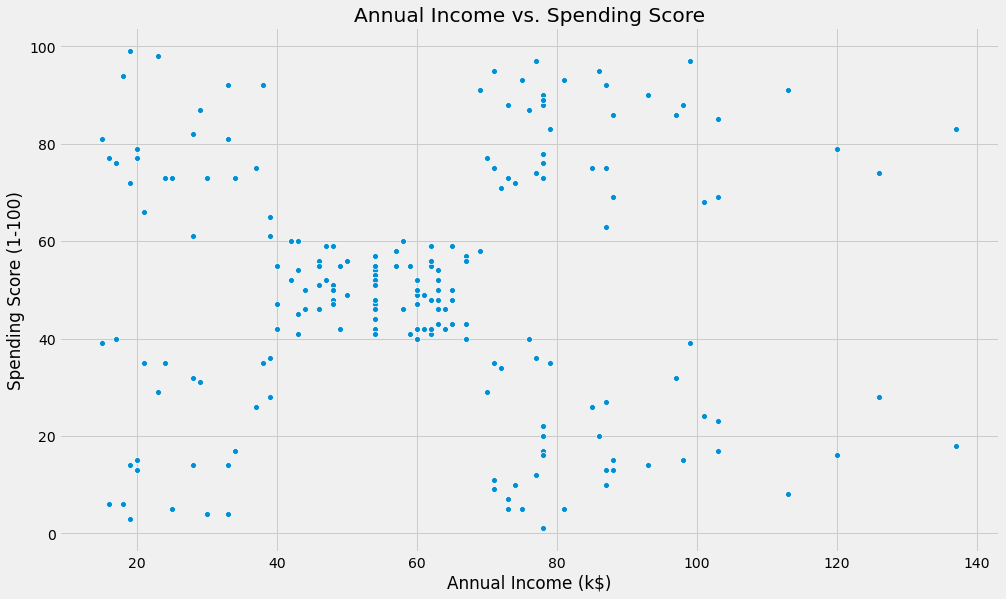

In [17]:
plt.figure(figsize=(15, 9))
plt.title("Annual Income vs. Spending Score")
sns.scatterplot(x=full_data['Annual Income (k$)'], y=full_data['Spending Score (1-100)'])

plt.show()

In [18]:
income_X = full_data.iloc[:, [3, 4]].values

In [19]:
income_X.shape

(200, 2)

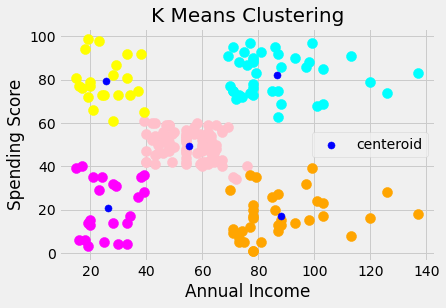

In [20]:
km = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_means = km.fit_predict(income_X)

plt.scatter(income_X[y_means == 0, 0], income_X[y_means == 0, 1], s = 100, c = 'pink')
plt.scatter(income_X[y_means == 1, 0], income_X[y_means == 1, 1], s = 100, c = 'yellow')
plt.scatter(income_X[y_means == 2, 0], income_X[y_means == 2, 1], s = 100, c = 'cyan')
plt.scatter(income_X[y_means == 3, 0], income_X[y_means == 3, 1], s = 100, c = 'magenta')
plt.scatter(income_X[y_means == 4, 0], income_X[y_means == 4, 1], s = 100, c = 'orange')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 50, c = 'blue' , label = 'centeroid')

plt.title('K Means Clustering', fontsize = 20)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.show()

The algorithm also successfully make the 5 clusters for these two variables.